In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
df_lenovo = pd.read_csv(r'C:\Users\gst8882\Desktop\DSC541\lenovo.csv')

df_lenovo.head()

,Plant,item/Component,Date,FG,Quantity
0,1001,000000000000011977,20171123,209MH32,1
1,1001,000000000000008820,20171123,209MH32,1
2,1001,SSW0F82867,20171123,209MH32,1
3,1001,SSW0G44678,20171123,209MH32,1
4,1001,SSW0F63159,20171123,209MH32,2


In [2]:
df_lenovo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
Plant             155 non-null int64
item/Component    155 non-null object
Date              155 non-null int64
FG                155 non-null object
Quantity          155 non-null int64
dtypes: int64(3), object(2)
memory usage: 6.1+ KB


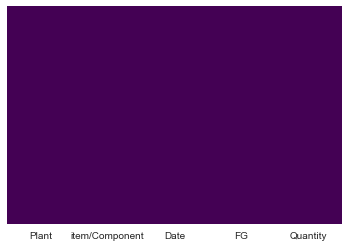

In [3]:
sns.heatmap(df_lenovo.isnull(),yticklabels=False,cbar=False,cmap='viridis')

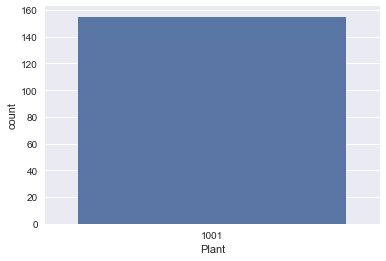

In [4]:
sns.countplot(x='Plant', data=df_lenovo)
# one plant 

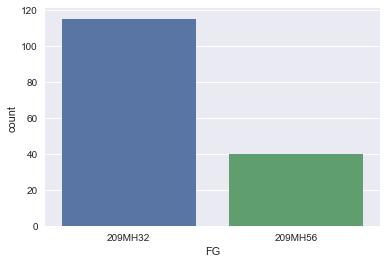

In [5]:
sns.countplot(x='FG', data=df_lenovo)
# 2 Finished goods

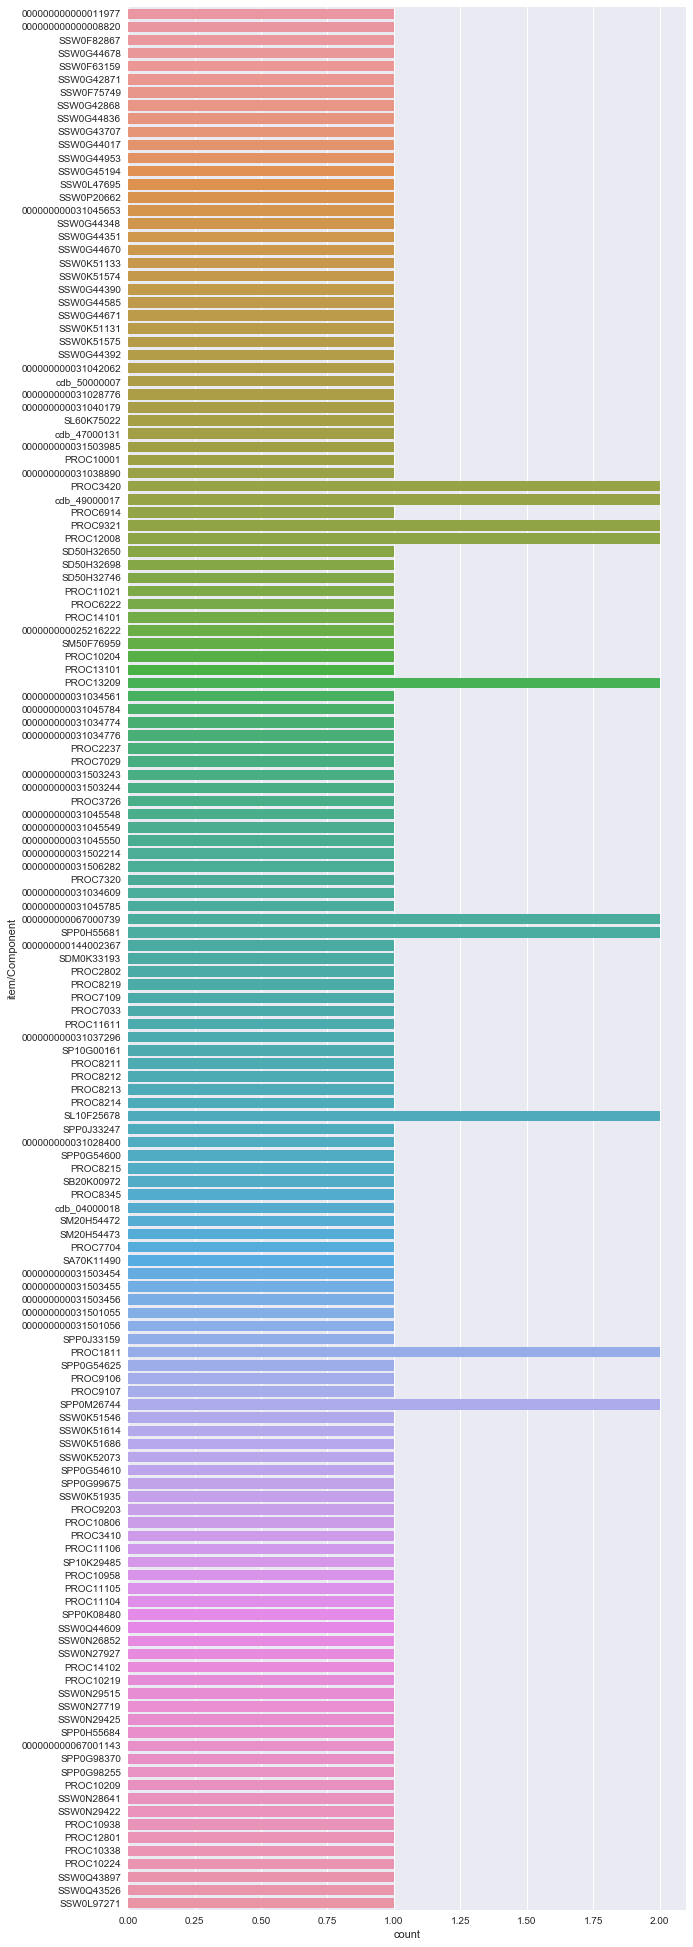

In [17]:
plt.subplots(figsize=(10,35))
sns.countplot( y='item/Component',  data=df_lenovo)


In [16]:
#Check them out
df_lenovo['item/Component'].value_counts()

PROC9321              2
PROC13209             2
SPP0H55681            2
PROC12008             2
cdb_49000017          2
SPP0M26744            2
SL10F25678            2
000000000067000739    2
PROC3420              2
PROC1811              2
000000000031045653    1
SSW0G44017            1
PROC11104             1
PROC8345              1
000000000031034776    1
SSW0G44351            1
000000000031040179    1
PROC10219             1
000000000031503243    1
PROC8214              1
000000000031506282    1
PROC11105             1
PROC6222              1
PROC14102             1
SSW0G42871            1
PROC10001             1
SA70K11490            1
000000000031042062    1
000000000031045549    1
PROC9107              1
                     ..
PROC11106             1
PROC10958             1
SSW0G44585            1
PROC3410              1
000000000031045550    1
SD50H32698            1
000000000031028400    1
000000000031045784    1
000000000031045785    1
000000000031037296    1
PROC14101       